## Начинаем предобработку

попробуем посмотреть как можно пред обработать изображение для дальнейшего поиска

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Попробуем разобраться на примере одной фотографии. возьмем одну из картинок, что бы на ней создать хорошую модель 

In [2]:
train_im = cv2.imread(r'E:\ds3-spring-2018\kaggle\solders\Training\images\image10.jpg')
train_GT = cv2.imread(r'E:\ds3-spring-2018\kaggle\solders\Training\GT\image10.jpg')

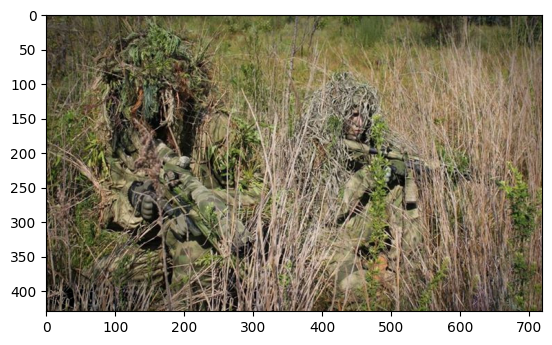

In [3]:
plt.imshow(cv2.cvtColor(train_im, cv2.COLOR_BGR2RGB))

In [4]:
class Filter:
    '''В данной функции реализованы фильтры Гаусса, медианный, нормализованный прямоугольный.
    Сдеано это для удобства вычислений и практики ОПП
    #### img - изображение которое мы хотим отфильтровать
    #### k_size - размер фильтра
    '''

    def __init__(self, img, k_size):  
        self.img = img 
        self.k_size = k_size

    def Gauss(self):
        img_u8 = self.img.astype(np.uint8)
        return cv2.GaussianBlur(img_u8,(k_size,k_size),sigmaX=k_size,sigmaY=k_size)
    
    def Median(self):
        return cv2.medianBlur(self.img,k_size)
    
    def Blur(self):
        return cv2.blur(self.img,(k_size,k_size))
    
    #staticmethod позволяет вызывать функцию без обьявления экземпляра класса
    @staticmethod
    def plot(self):
        plt.imshow(self)

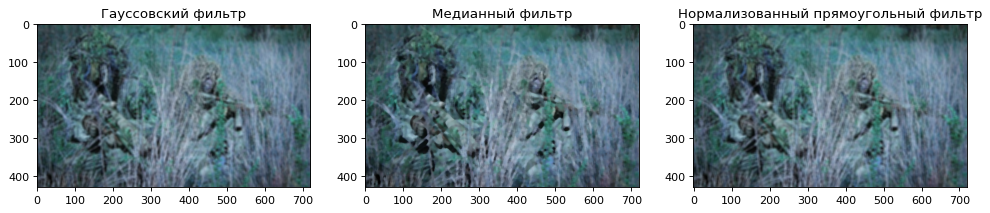

In [5]:
k_size=7 # размеры филтра 
x1,x2,y1,y2=200,400,400,600 
# своеобразная маска для более детального рассмотрения фото
# добавляем эту маску к значению фильтра  ([x1:x2, y1:y2])

plt.figure(figsize=(15, 8), dpi=80)

plt.subplot(1, 3, 1)
plt.title("Гауссовский фильтр") 
Filter.plot( Filter(train_im,k_size).Gauss() )

plt.subplot(1, 3, 2) 
plt.title('Медианный фильтр')
Filter.plot( Filter(train_im,k_size).Median() )

plt.subplot(1, 3, 3) 
plt.title('Нормализованный прямоугольный фильтр')
Filter.plot( Filter(train_im,k_size).Blur() )


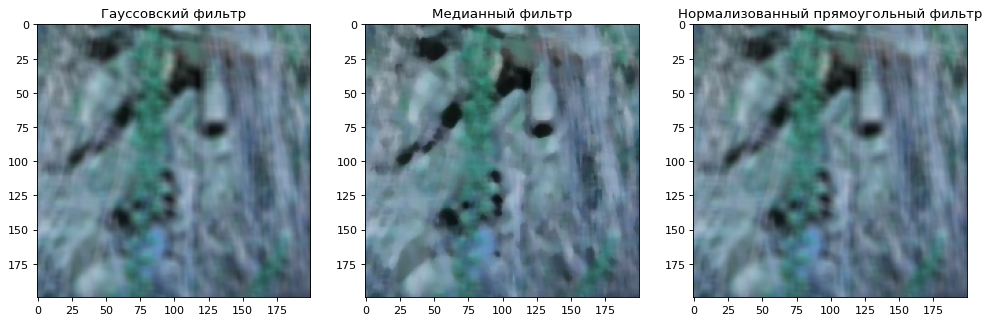

In [6]:
x1,x2,y1,y2=200,400,400,600 
# своеобразная маска для более детального рассмотрения фото
# добавляем эту маску к значению фильтра  ([x1:x2, y1:y2])

plt.figure(figsize=(15, 8), dpi=80)

plt.subplot(1, 3, 1)
plt.title("Гауссовский фильтр") 
Filter.plot( Filter(train_im,k_size).Gauss()[x1:x2, y1:y2] )

plt.subplot(1, 3, 2) 
plt.title('Медианный фильтр')
Filter.plot( Filter(train_im,k_size).Median()[x1:x2, y1:y2] )

plt.subplot(1, 3, 3) 
plt.title('Нормализованный прямоугольный фильтр')
Filter.plot( Filter(train_im,k_size).Blur()[x1:x2, y1:y2] )


с помощью медианного фильтра удалось получить сглаженное и более четкое изображение.  Далее еще раз применим фильтр , но у же с рамерностью меньшей , чем в начале. Посмотрим повлияет ли это на качество выделения 

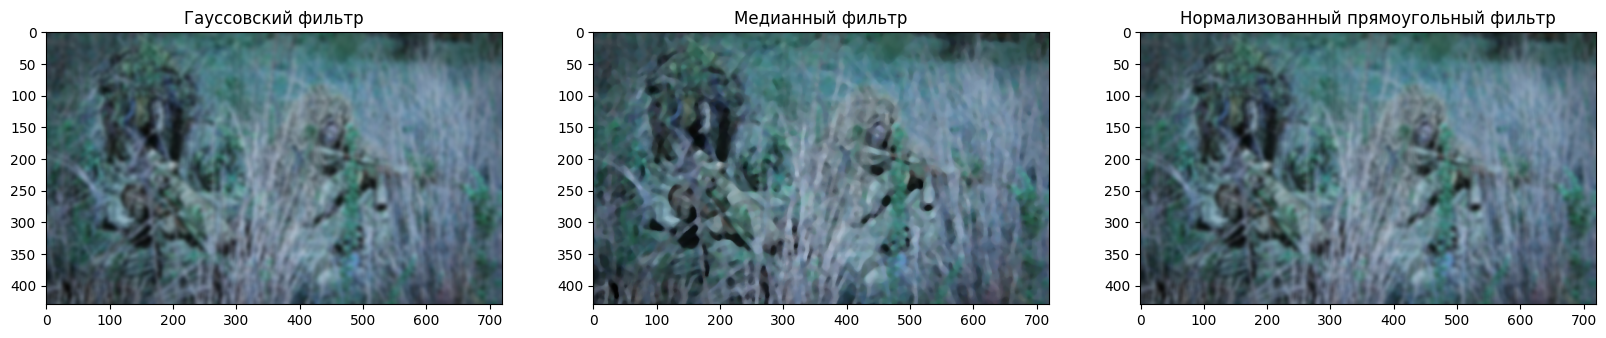

In [7]:
k_size=7 # размеры филтра 
x1,x2,y1,y2=200,400,400,600 
# своеобразная маска для более детального рассмотрения фото
# добавляем эту маску к значению фильтра  ([x1:x2, y1:y2])

plt.figure(figsize=(20, 10), dpi=100)

plt.subplot(1, 3, 1)
plt.title("Гауссовский фильтр") 
G=Filter(train_im,k_size).Gauss()
Filter.plot( Filter(G,k_size).Gauss() )

plt.subplot(1, 3, 2) 
plt.title('Медианный фильтр')
M=Filter(train_im,k_size).Median()
Filter.plot( Filter(M,k_size).Median())

plt.subplot(1, 3, 3) 
plt.title('Нормализованный прямоугольный фильтр')
B=Filter(train_im,k_size).Blur()
Filter.plot( Filter(B,k_size).Blur())


Особо это не дало результатов, но видно ,что медианный фильтр не плохо зарекомендовал себя

Выполним операции по выделения контура, используя медианный фильтр

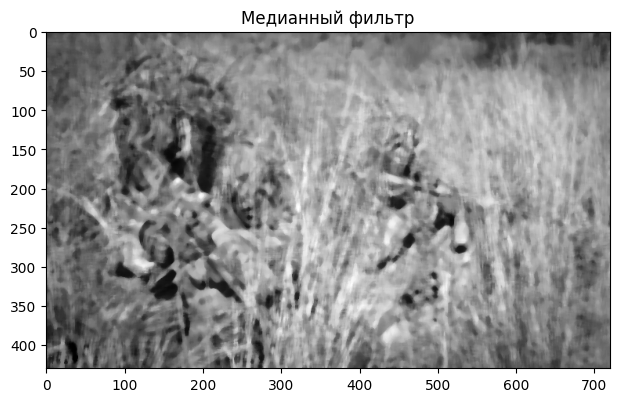

In [8]:
img_grey = cv2.cvtColor(train_im,cv2.COLOR_BGR2GRAY)
img=Filter(img_grey,k_size).Median()

plt.figure(figsize=(16, 10), dpi=100)

plt.subplot(1, 2, 1) 
plt.title('Медианный фильтр')
plt.imshow(img,cmap='gray')

---

Теперь постараемя выделить конетуры на изображени после фильтрации

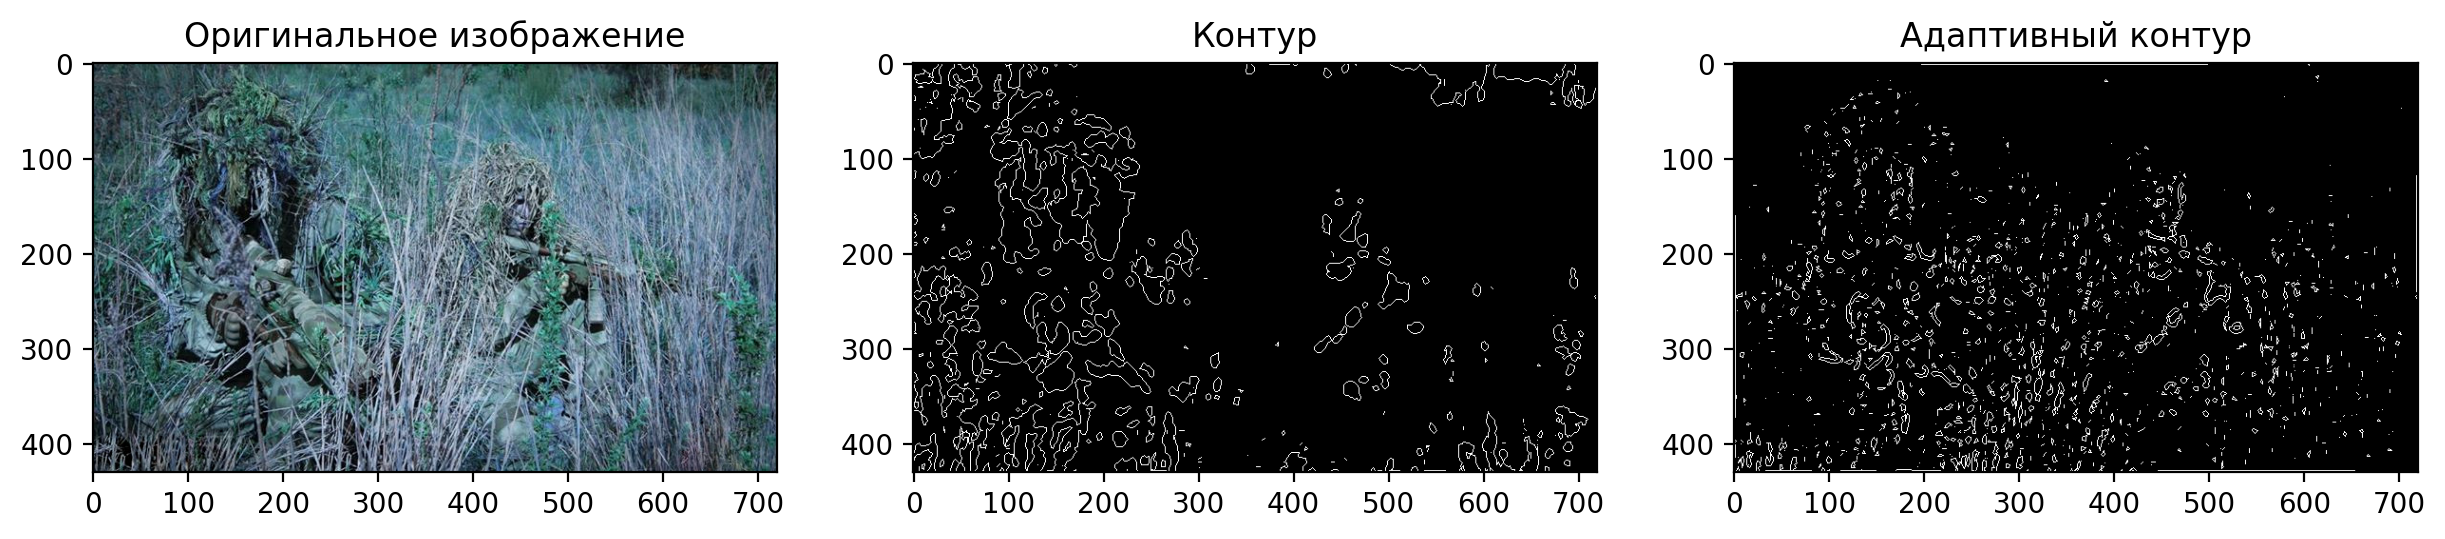

In [30]:
#задаем порог по пикселю
thresh = 70

#принимаем пороговое изображение
ret,thresh_img = cv2.threshold(img, thresh, 225, cv2.THRESH_BINARY)

#ищем контур
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)

#созданная пустышка, чтоб потом можно было записать туда конткр
img_contours = np.uint8(np.zeros((img.shape[0],img.shape[1])))
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

# Адаптивный контур
th = cv2.adaptiveThreshold(img,133,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,13)
contours_ad, hierarchy_ad = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
img_contours_ad = np.uint8(np.zeros((img.shape[0],img.shape[1])))
cv2.drawContours(img_contours_ad, contours_ad, -1, (255,255,255), 1)

plt.figure(figsize=(15, 8), dpi=200)

plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение')
plt.imshow( train_im, cmap='gray') # выводим итоговое изображение в окно

plt.subplot(1, 3, 2)
plt.title('Контур')
plt.imshow(img_contours, cmap='gray') # выводим итоговое изображение в окно

plt.subplot(1, 3, 3)
plt.title('Адаптивный контур')
plt.imshow(img_contours_ad,cmap='gray') # выводим итоговое изображение в окно

после того как мы выделили контуры двумя методами (В ручную и адаптивным), уже начинает обрисовываться четкий силуэт военнослужащего при адитивном методе. Видно что проявляются локальные максимумы изменения интенсивности, по фото это жирные линии контура , а ее не плохо выделен силуэт относительно ручного метода.

---

попробуем разобраться с градиентными фильтрами, чет не пошло. Но это не беда позже можно

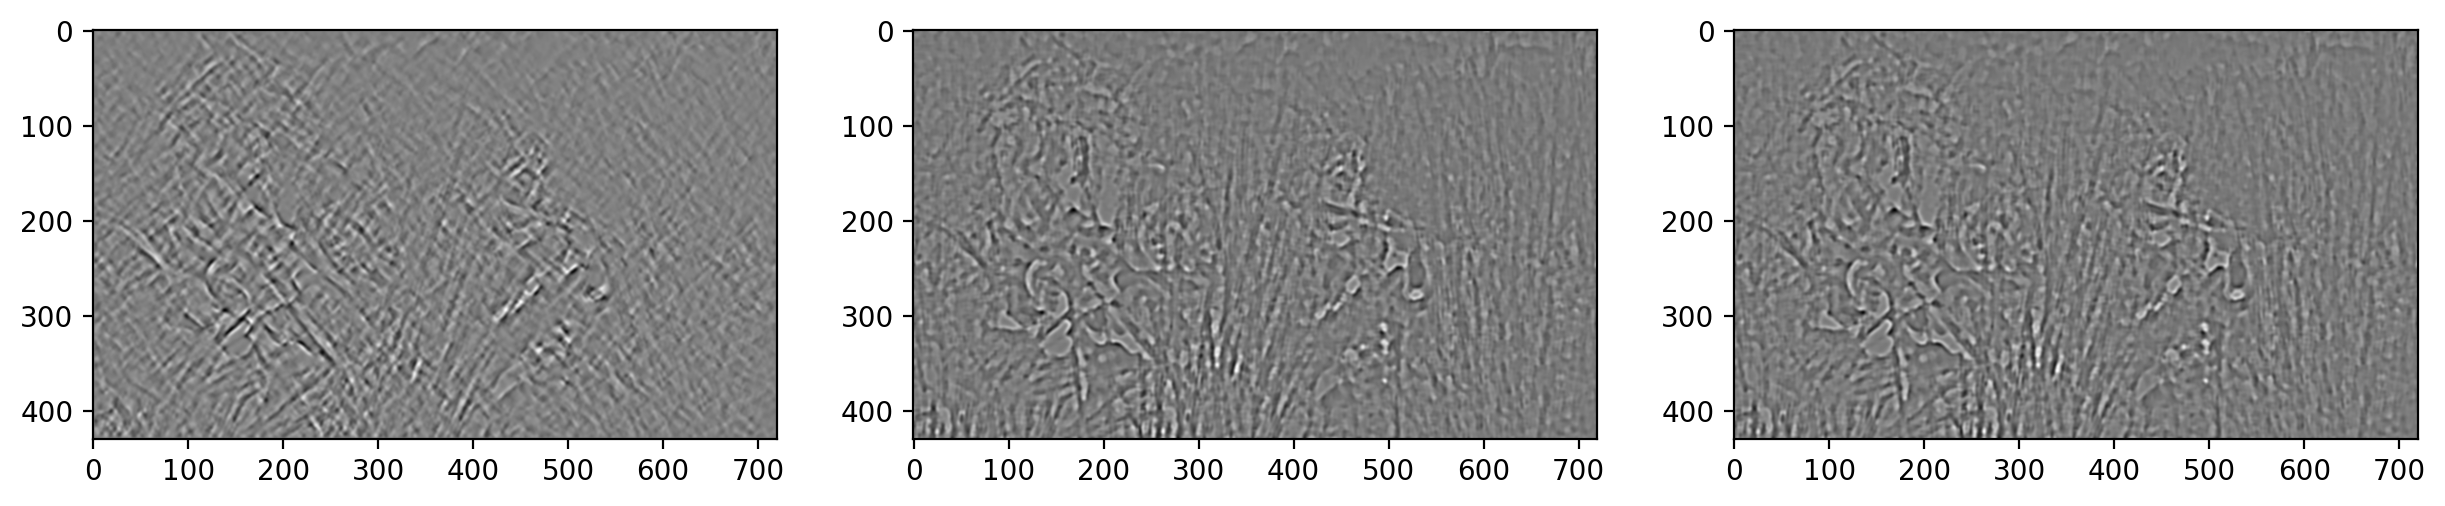

In [10]:
plt.figure(figsize=(15, 8), dpi=200)

plt.subplot(1, 3, 1)
sobel=cv2.Sobel( img, cv2.CV_64F, dx=1, dy=1, ksize=13)
plt.imshow(sobel,cmap = 'gray')

plt.subplot(1, 3, 2)
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=13,delta=5)
plt.imshow(laplacian,cmap = 'gray')

plt.subplot(1, 3, 3)
cany=cv2.Canny(img,threshold1=60,threshold2=100,L2gradient=True)
plt.imshow(laplacian,cmap = 'gray')

---

Теперь постораемся обединить контурв , которые мы получили с помощью метода адитивного порога

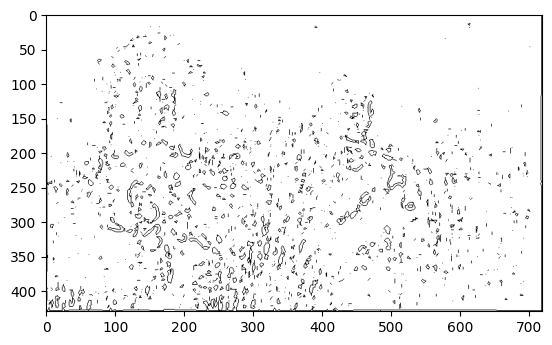

In [31]:
img_contours=cv2.bitwise_not(img_contours_ad)
plt.imshow(img_contours,cmap='gray')

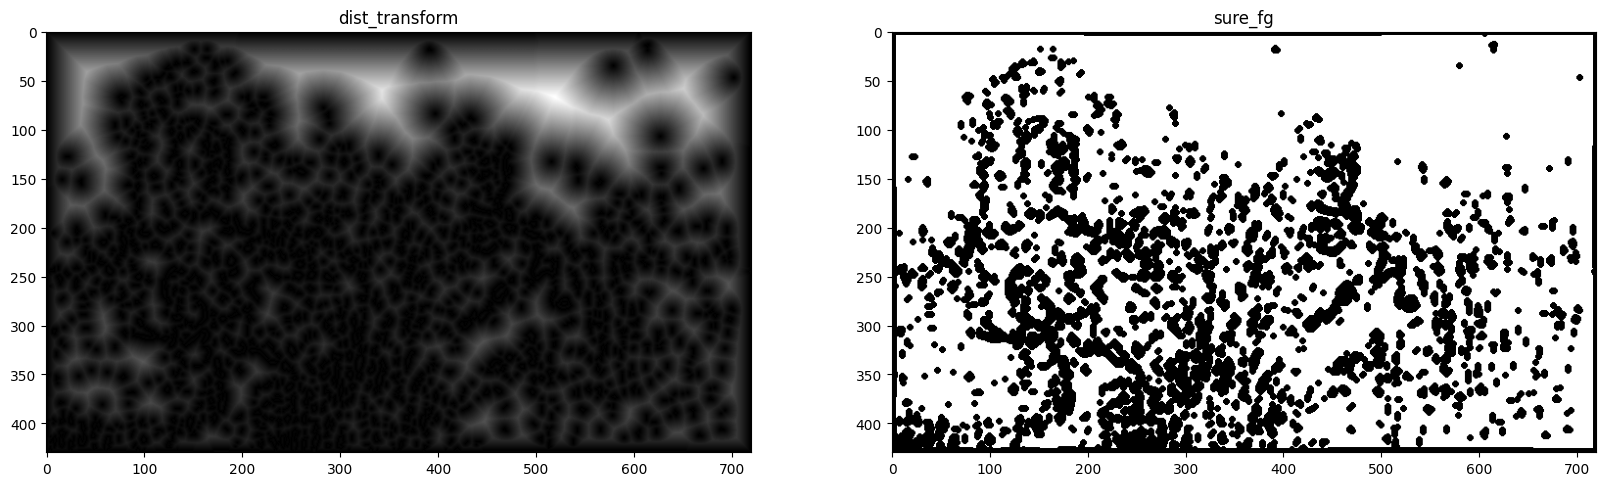

In [35]:
dist_transform = cv2.distanceTransform(img_contours,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)

fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(dist_transform, cmap='gray');
subplot.set_title('dist_transform');

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(sure_fg, cmap='gray');
subplot.set_title('sure_fg');

---

## Формируем датасет 


можно перезапускать , чтобы изменить набор данных  
а если ничего не меняли, то хватит и одного запушенного раза

теперь напишем функцию которая преобразует наши данные в вектор значений

In [13]:
import tensorflow as tf
import os

In [125]:
path='E:/ds3-spring-2018/kaggle/solders/Trn/train'

def vectorize_im(path,k_size,thresh,width,num):
    filelist=os.listdir(f'{path}')
    img_mat=np.zeros((len(filelist),256,256))

    n=-1
    for i in filelist[:num]:
        n+=1
        #читаем изображение из папки
        read = cv2.cvtColor(cv2.imread(path+'/'+i), cv2.COLOR_BGR2GRAY)
        # Применяем фильтр к изображению
        img=Filter(read,k_size).Median()
        
        #теперь устанавливаем порог для изображения
        ret,thresh_img = cv2.threshold(img, thresh, 225, cv2.THRESH_BINARY)
        #ищем контур
        contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        #созданная пустышка, чтоб потом можно было записать туда конткр
        img_contours = np.uint8(np.zeros((thresh_img.shape[0],thresh_img.shape[1])))
        cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

        # Стараемся создать правдоподобную маску изображения для дальнейшей обработки
        img_contours=cv2.bitwise_not(img_contours)
        dist_transform = cv2.distanceTransform(img_contours,cv2.DIST_L2,5)
        ret, sure_fg = cv2.threshold(dist_transform,width*dist_transform.max(),255,0)

        # Форматируем изображение в более низкий формат (для экономии времени и обучения модели)
        final_mask = cv2.resize(sure_fg, (256,256))
    

        # если интересно можно в процессе обработки глянуть ,что как и по изменять (но тогда много не надо ставить num)
        '''fig = plt.figure(figsize=(20, 10))
        subplot = fig.add_subplot(1, 3, 1)
        plt.imshow(read,cmap='gray')
        subplot = fig.add_subplot(1, 3, 2)
        plt.imshow(sure_fg,cmap='gray')
        subplot = fig.add_subplot(1, 3, 3)
        plt.imshow(final_mask,cmap='gray')'''

        img_mat[n,:,:]=final_mask

    return img_mat


обработаем сами изображения и соберем из них датасет

In [58]:
# train
path='E:/ds3-spring-2018/kaggle/solders/Trn/train'
filelist=os.listdir(f'{path}')
k_size=7
data_train=vectorize_im('E:/ds3-spring-2018/kaggle/solders/Trn/train',
               k_size=15,
               thresh=50,
               width=0.06,
               num=len(filelist))

data_train = data_train.astype('float32')
data_train /= 255

np.save('test_images.npy', data_train)
# тренировочный датасет изображений
train_img = tf.data.Dataset.from_tensor_slices(data_train) 

In [126]:
# test
#k_size=7
data_test=vectorize_im('E:/ds3-spring-2018/kaggle/solders/Trn/test',
               k_size=15,
               thresh=50,
               width=0.06,
               num=len(filelist))

data_test = data_test.astype('float32')
data_test /= 255

np.save('test_images.npy', data_test)
test_img = tf.data.Dataset.from_tensor_slices(data_test) 

теперь переведем образы в датасет

In [122]:
path='E:/ds3-spring-2018/kaggle/solders/Val/train'
filelist=os.listdir(f'{path}')

def vectorize_gt(path,num):
    filelist=os.listdir(f'{path}')
    img_mat=np.zeros((len(filelist),256,256))

    n=-1
    for i in filelist[:num]:
        n+=1
        #читаем изображение из папки
        read = cv2.cvtColor(cv2.imread(path+'/'+i), cv2.COLOR_BGR2GRAY)
       
        # Форматируем изображение в более низкий формат (для экономии времени и обучения модели)
        final_mask = cv2.resize(read, (256,256))
    

        # если интересно можно в процессе обработки глянуть ,что как и по изменять (но тогда много не надо ставить num)
        '''fig = plt.figure(figsize=(20, 10))
        subplot = fig.add_subplot(1, 3, 1)
        plt.imshow(read,cmap='gray')
        subplot = fig.add_subplot(1, 3, 2)
        plt.imshow(sure_fg,cmap='gray')
        subplot = fig.add_subplot(1, 3, 3)
        plt.imshow(final_mask,cmap='gray')'''

        img_mat[n,:,:]=final_mask

    return img_mat

In [57]:
# train
path='E:/ds3-spring-2018/kaggle/solders/Val/train'
filelist=os.listdir(f'{path}')

data_tr_gt=vectorize_gt('E:/ds3-spring-2018/kaggle/solders/Val/train',
               num=len(filelist))

data_tr_gt = data_tr_gt.astype('float32')
data_tr_gt /= 255

np.save('train_gt.npy', data_tr_gt)
train_gt = tf.data.Dataset.from_tensor_slices(data_tr_gt) 

In [123]:
# test
path='E:/ds3-spring-2018/kaggle/solders/Val/test'
filelist=os.listdir(f'{path}')

data_ts_gt=vectorize_gt('E:/ds3-spring-2018/kaggle/solders/Val/test',
               num=len(filelist))

data_ts_gt = data_ts_gt.astype('float32')
data_ts_gt /= 255

np.save('test_gt.npy', data_ts_gt)
test_gt = tf.data.Dataset.from_tensor_slices(data_ts_gt) 

если файлы .npy уде есть запускаем эту ячейку

In [127]:
data_train=np.load('train_images.npy')
train_img = tf.data.Dataset.from_tensor_slices(data_train) 
data_test=np.load('test_images.npy')
test_img = tf.data.Dataset.from_tensor_slices(data_test) 
data_tr_gt=np.load('train_gt.npy')
train_gt = tf.data.Dataset.from_tensor_slices(data_tr_gt) 
data_ts_gt=np.load('test_gt.npy')
test_gt = tf.data.Dataset.from_tensor_slices(data_ts_gt) 

---

## Заливаем данные в нейронную сеть

Общей идеей является найти похожие изображение, в нашем случаем изображение с ее образом. Возможно перевести изображение в контур и в дольнейшем сравнивать 

In [83]:
shape=np.shape(list(train_img.as_numpy_iterator()))+(1,)

In [101]:
def build_deep_autoencoder(img_shape, code_size):
    # encoder
    encoder = tf.keras.models.Sequential() # инициализация модели
    encoder.add(tf.keras.layers.Input(shape=img_shape)) # добавление входного слоя, размер равен размеру изображения
    encoder.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same',input_shape=(256, 256, 1)))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(tf.keras.layers.Flatten())
    encoder.add(tf.keras.layers.Dense(code_size))

    # decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(tf.keras.layers.InputLayer((code_size,)))
    decoder.add(tf.keras.layers.Dense(16*16*256))
    decoder.add(tf.keras.layers.Reshape((16, 16, 256)))
    decoder.add(tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

B,H,W,D=shape
encoder, decoder = build_deep_autoencoder((H,W,D), code_size=32)
encoder.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 32, 32, 128)     

In [102]:
decoder.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 65536)             2162688   
                                                                 
 reshape_11 (Reshape)        (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_40 (Conv2  (None, 32, 32, 128)       295040    
 DTranspose)                                                     
                                                                 
 conv2d_transpose_41 (Conv2  (None, 64, 64, 64)        73792     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_42 (Conv2  (None, 128, 128, 32)      18464     
 DTranspose)                                                     
                                                     

In [103]:
inp = tf.keras.Input(shape=(H,W,D))
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')
autoencoder.fit(x=data_train,y=data_tr_gt, epochs=10, )

Epoch 1/10
20/20 [==============================] - 23s 1s/step - loss: 0.1805
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 0.1253
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 0.1177
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 0.1159
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.1128
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 0.1052
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 0.1000
Epoch 8/10
20/20 [==============================] - 22s 1s/step - loss: 0.0916
Epoch 9/10
20/20 [==============================] - 22s 1s/step - loss: 0.0846
Epoch 10/10
20/20 [==============================] - 22s 1s/step - loss: 0.0786


In [128]:

codes_tr = encoder.predict(data_train) 
assert len(codes_tr) == len(data_train)

codes_ts = encoder.predict(data_test) 
assert len(codes_ts) == len(data_test)

codes_tr_gt = encoder.predict(data_tr_gt) 
assert len(codes_tr_gt) == len(data_tr_gt)

codes_ts_gt = encoder.predict(data_ts_gt) 
assert len(codes_ts_gt) == len(data_ts_gt)


4/4 [==============================] - 1s 221ms/step


In [137]:
from sklearn.neighbors import KNeighborsRegressor
nei_clf = KNeighborsRegressor(metric="euclidean")
y=nei_clf.fit(codes_tr,codes_tr_gt).predict(codes_ts)

In [151]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

mean_squared_error(codes_ts_gt[0], y[0])

0.0023508694

In [153]:
ts_im = decoder.predict(codes_ts_gt) 
predim=decoder.predict(y) 


4/4 [==============================] - 0s 85ms/step


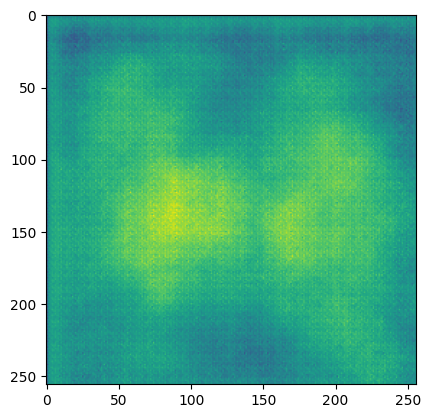

In [154]:
plt.imshow(ts_im[0])

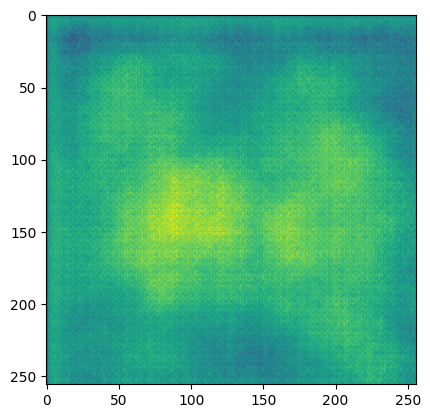

In [156]:
plt.imshow(predim[0])